# Breast Cancer Classification Using Machine Learning

## Problem Statement

Find out whether the cancer is benign or malignan

### Importing libraries for Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset into Jupyter

In [2]:
dataset = load_breast_cancer()

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df = pd.DataFrame(dataset.data ,columns=dataset.feature_names)

In [7]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [8]:
df['target']=dataset.target

In [9]:
df.head() # will display the dataframe of 1st 5 rows of the dataset

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [10]:
df.tail() # will display the dataframe of lastt 5 rows of the dataset

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [11]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
df.shape  # will display the number of rows and columns

(569, 31)

In [13]:
df.columns # to get to know about the columns name 

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
df.info() #method provides a concise summary of the data, including the number of rows, columns, non-null values, and the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Every feature other than our target diagonsis is numerical variables

In [15]:
df.dtypes 

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [16]:
df.count() #It is used to count the number of non-null values in each column of a DataFrame or dataset.

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
target                     569
dtype: int64

### The specific statistical measures included in the summary can vary, but commonly include:

.Count: The number of non-null values in each column.

.Mean: The average value of each column.

.Standard deviation: A measure of the dispersion or variability in each column.

.Minimum: The minimum value in each column.

.25th percentile: The value below which 25% of the data falls.

.50th percentile (median): The value below which 50% of the data falls.

.75th percentile: The value below which 75% of the data falls.

.Maximum: The maximum value in each column.

In [17]:
df.describe(include = 'all')

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [18]:
#statistical summary of features
df.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

In [19]:
## let's identify whether the data contains any duplicated values or not.
## if it contains then we have to remove those values (row).

df[df.duplicated()] 

Empty DataFrame
Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, target]
Index: []

[0 rows x 31 columns]

There are no duplicates values in the dataset

# Exploratory Data Analysis

In [20]:
df.isnull().sum() # calculate the sum of null values for each column

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no null values in the dataset

In [21]:
df['target'].unique()

array([0, 1])

. 1 represents Malignant

. 0 represents Benign

# After Dealing with the missing values we proceed further with the df dataframe for our analysis.

### Univariate Analysis

In [22]:
import plotly.express as px

In [23]:
fig = px.histogram(df,x = "target",color = "target",barmode = "group")
fig.show()

In [24]:
fig = px.pie(df, values="mean radius", names="target", title="Relation")
fig.show()

### Multivariate Analysis

In [25]:
#selecting only numerical features
num_feat = df.select_dtypes(include=['float64', 'int64']).columns
num_feat

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

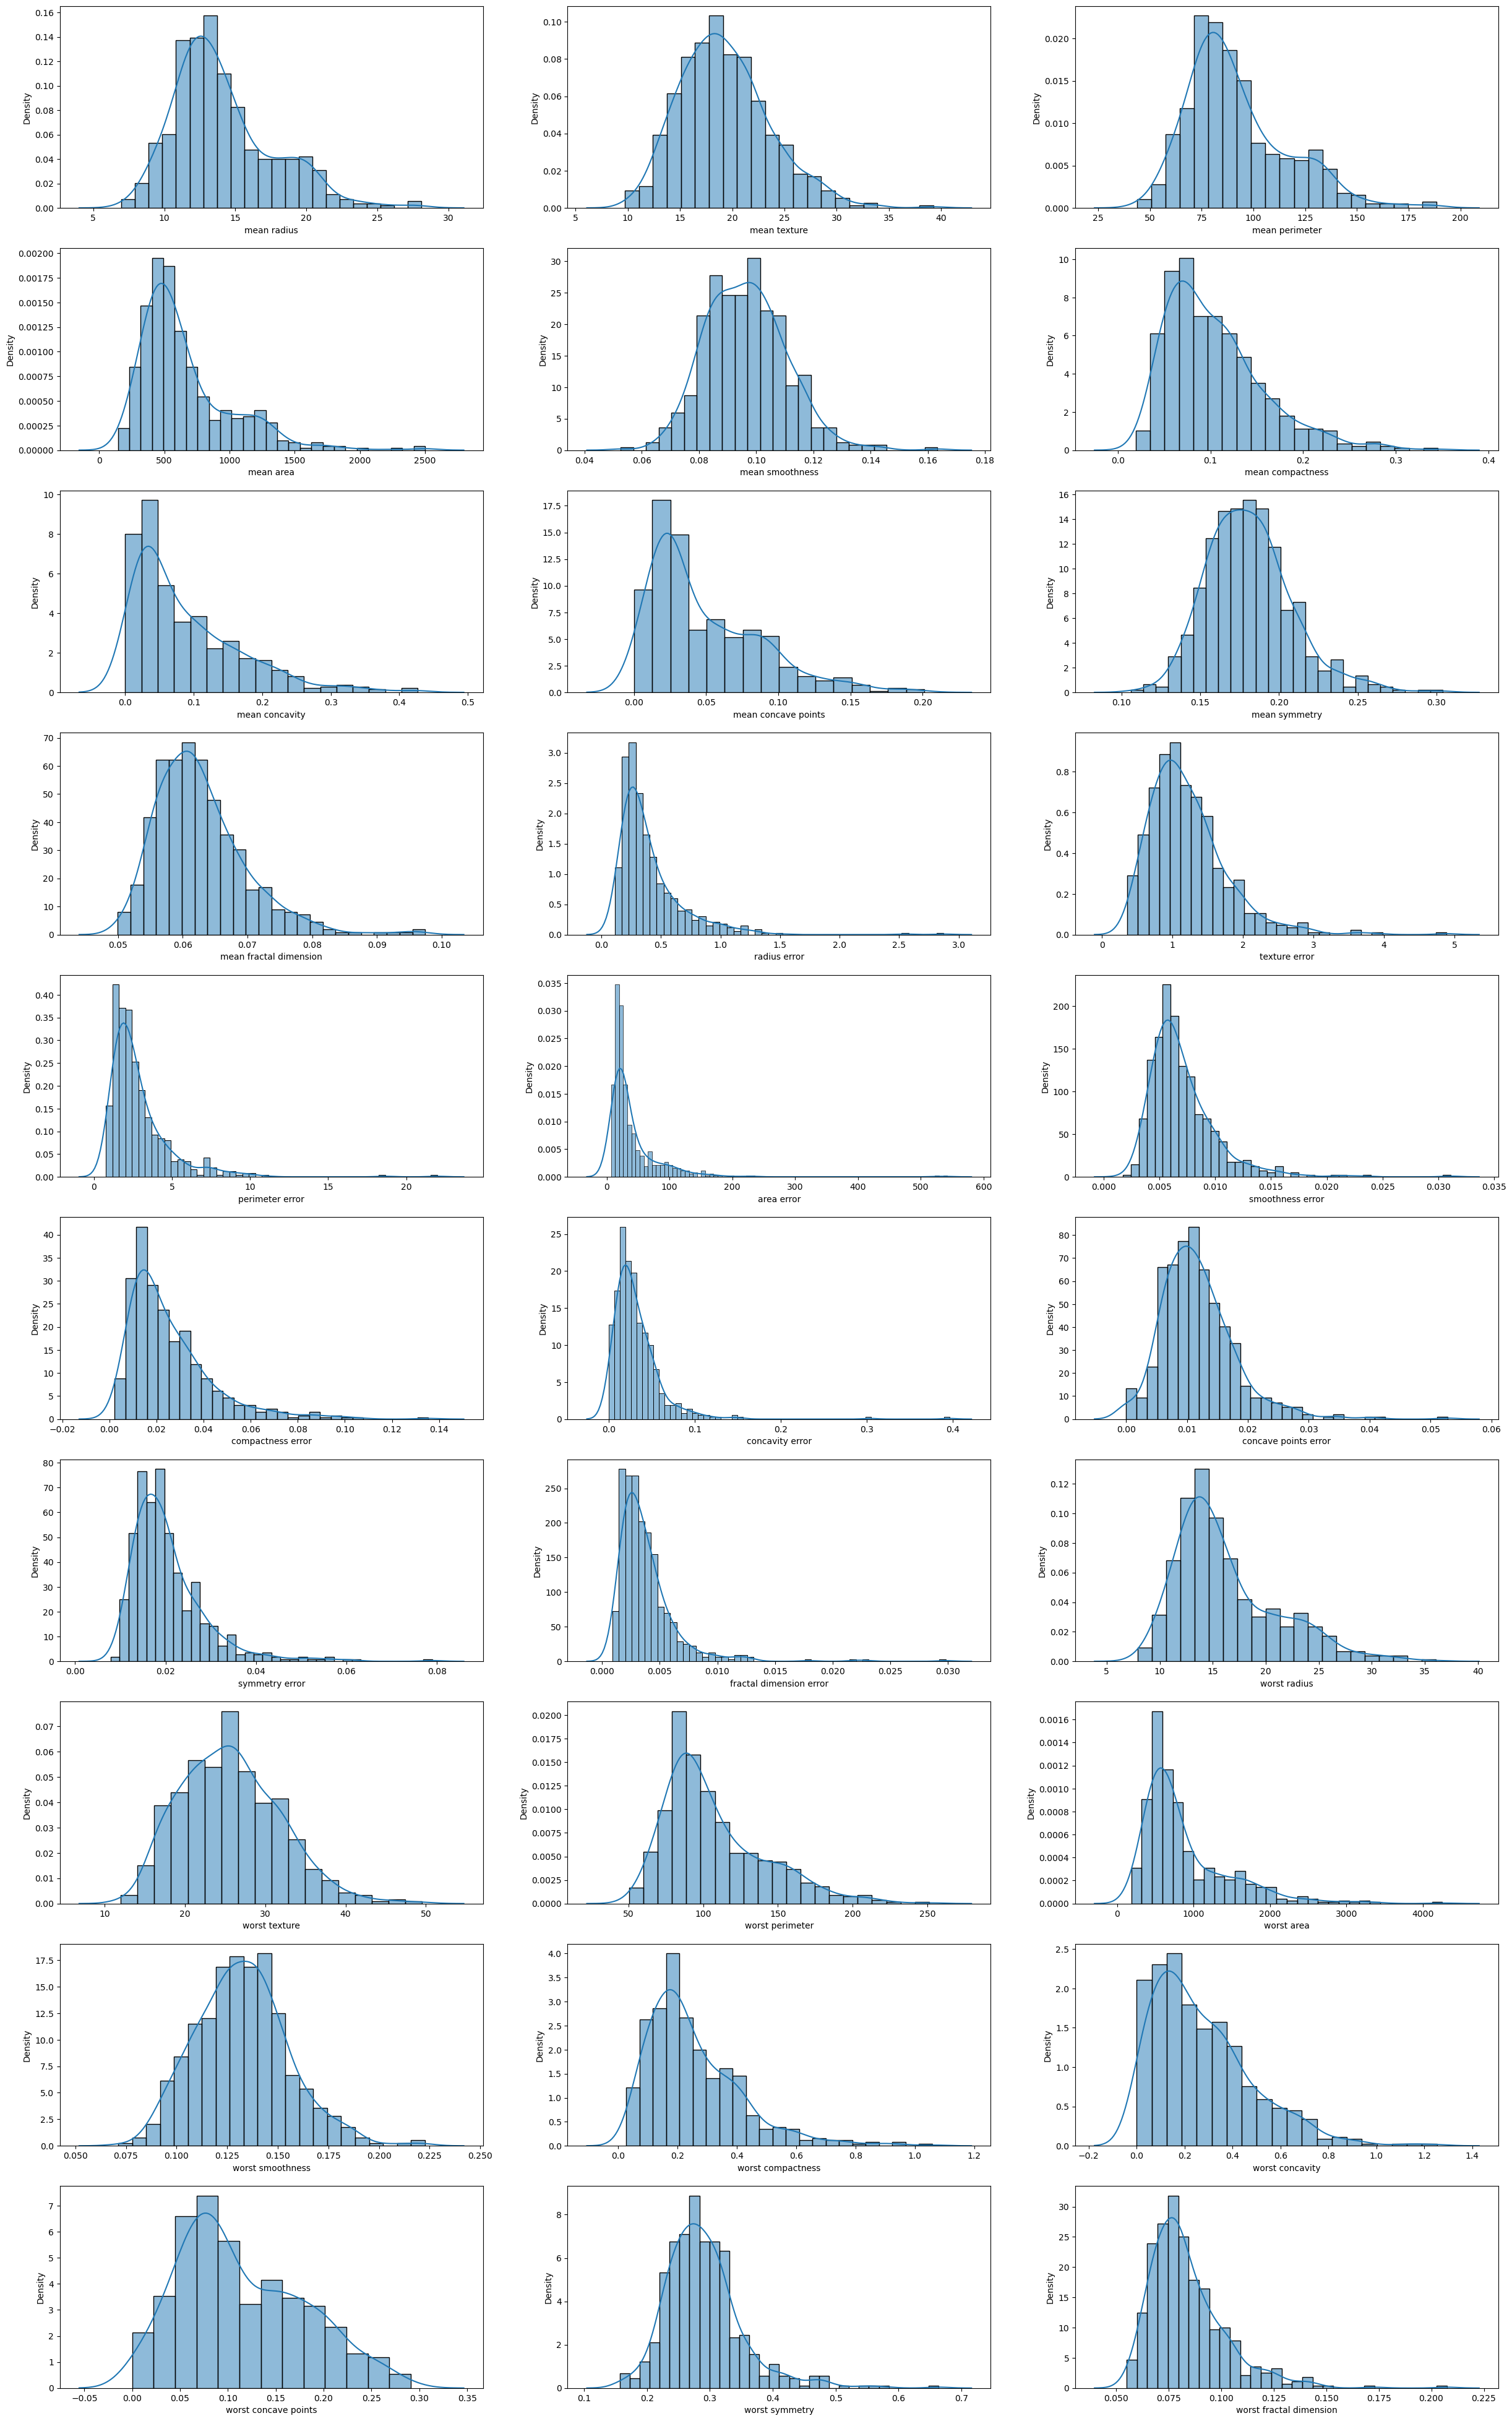

In [26]:
#plotting distributions of numerical features
plt.figure(figsize=(30,50))
for i, col in enumerate(num_feat, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))

.Features 'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean','symmetry_mean', 'texture_worst' and 'smoothness_worst', follow normal distribution.

.Other features follows right skewed distribution.

.Most of the features has outliers

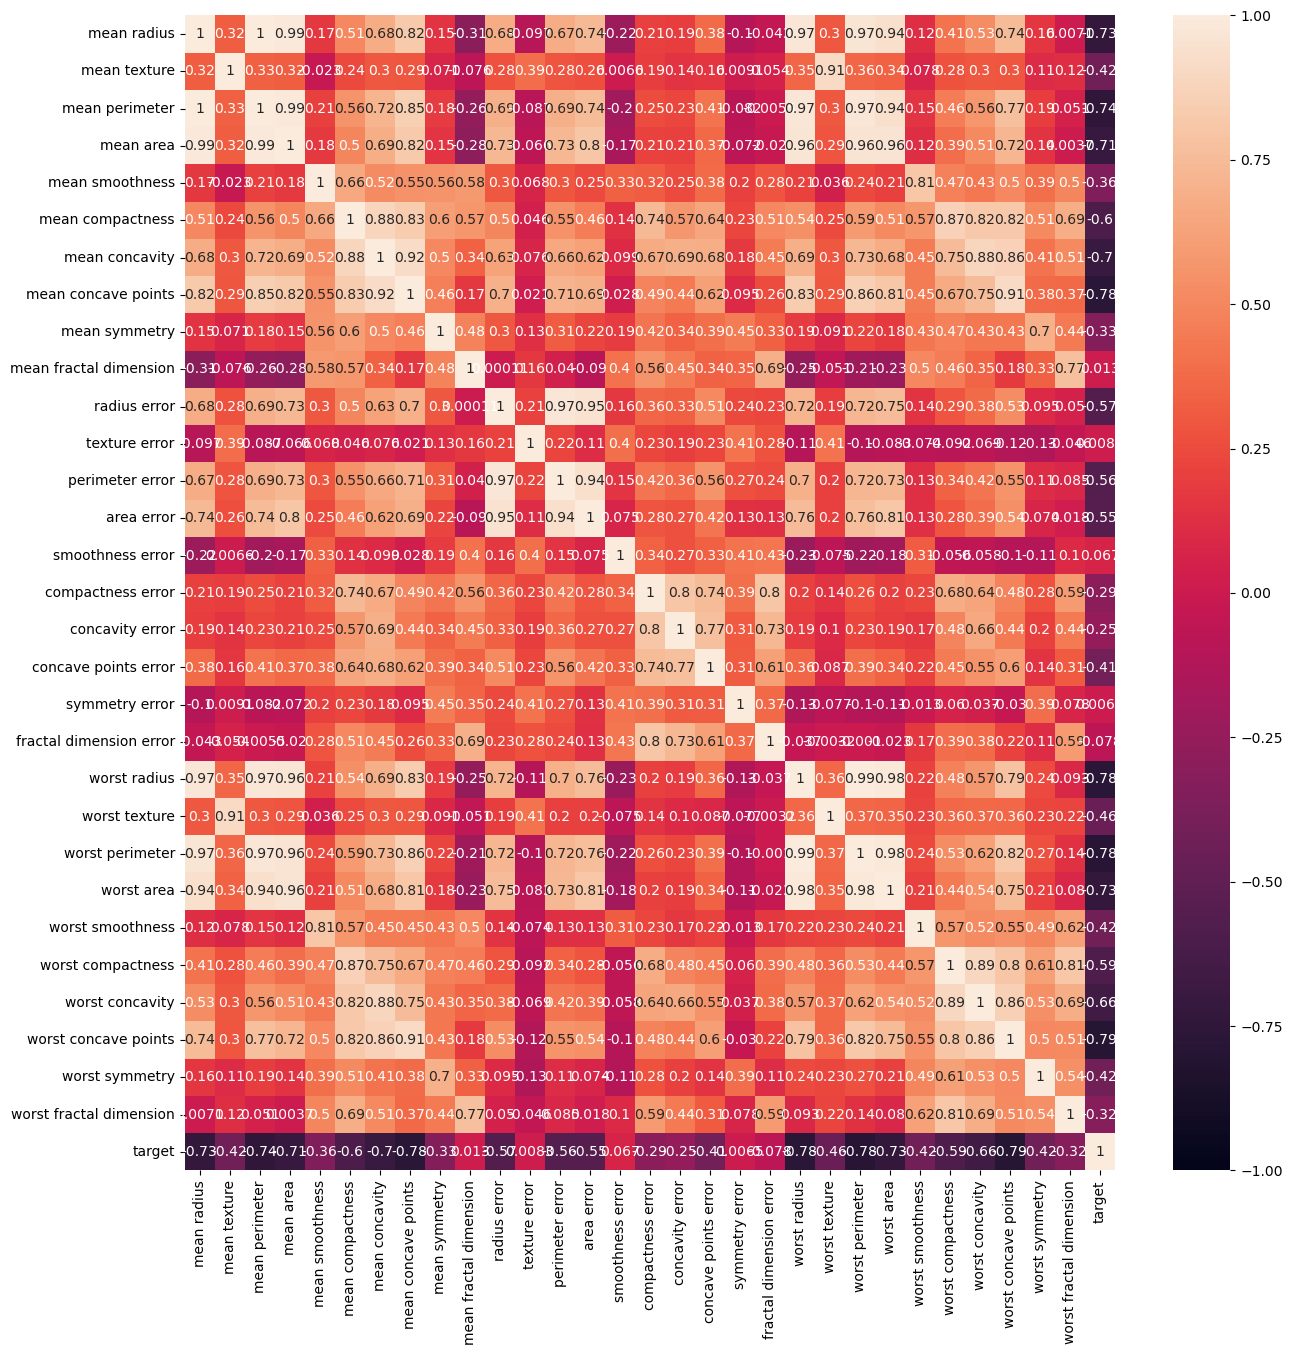

In [27]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1,)
plt.show()

There are multicollinearity in this dataset. Several features show strong posistivecorrelation.

In [28]:
#finding correlated features
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
correlatd_col = correlation(df, 0.8) #we are setting threshold as 0.8
print('Features showing multicollinearity : ')
correlatd_col


Features showing multicollinearity : 


{'area error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

### Positive Correlation

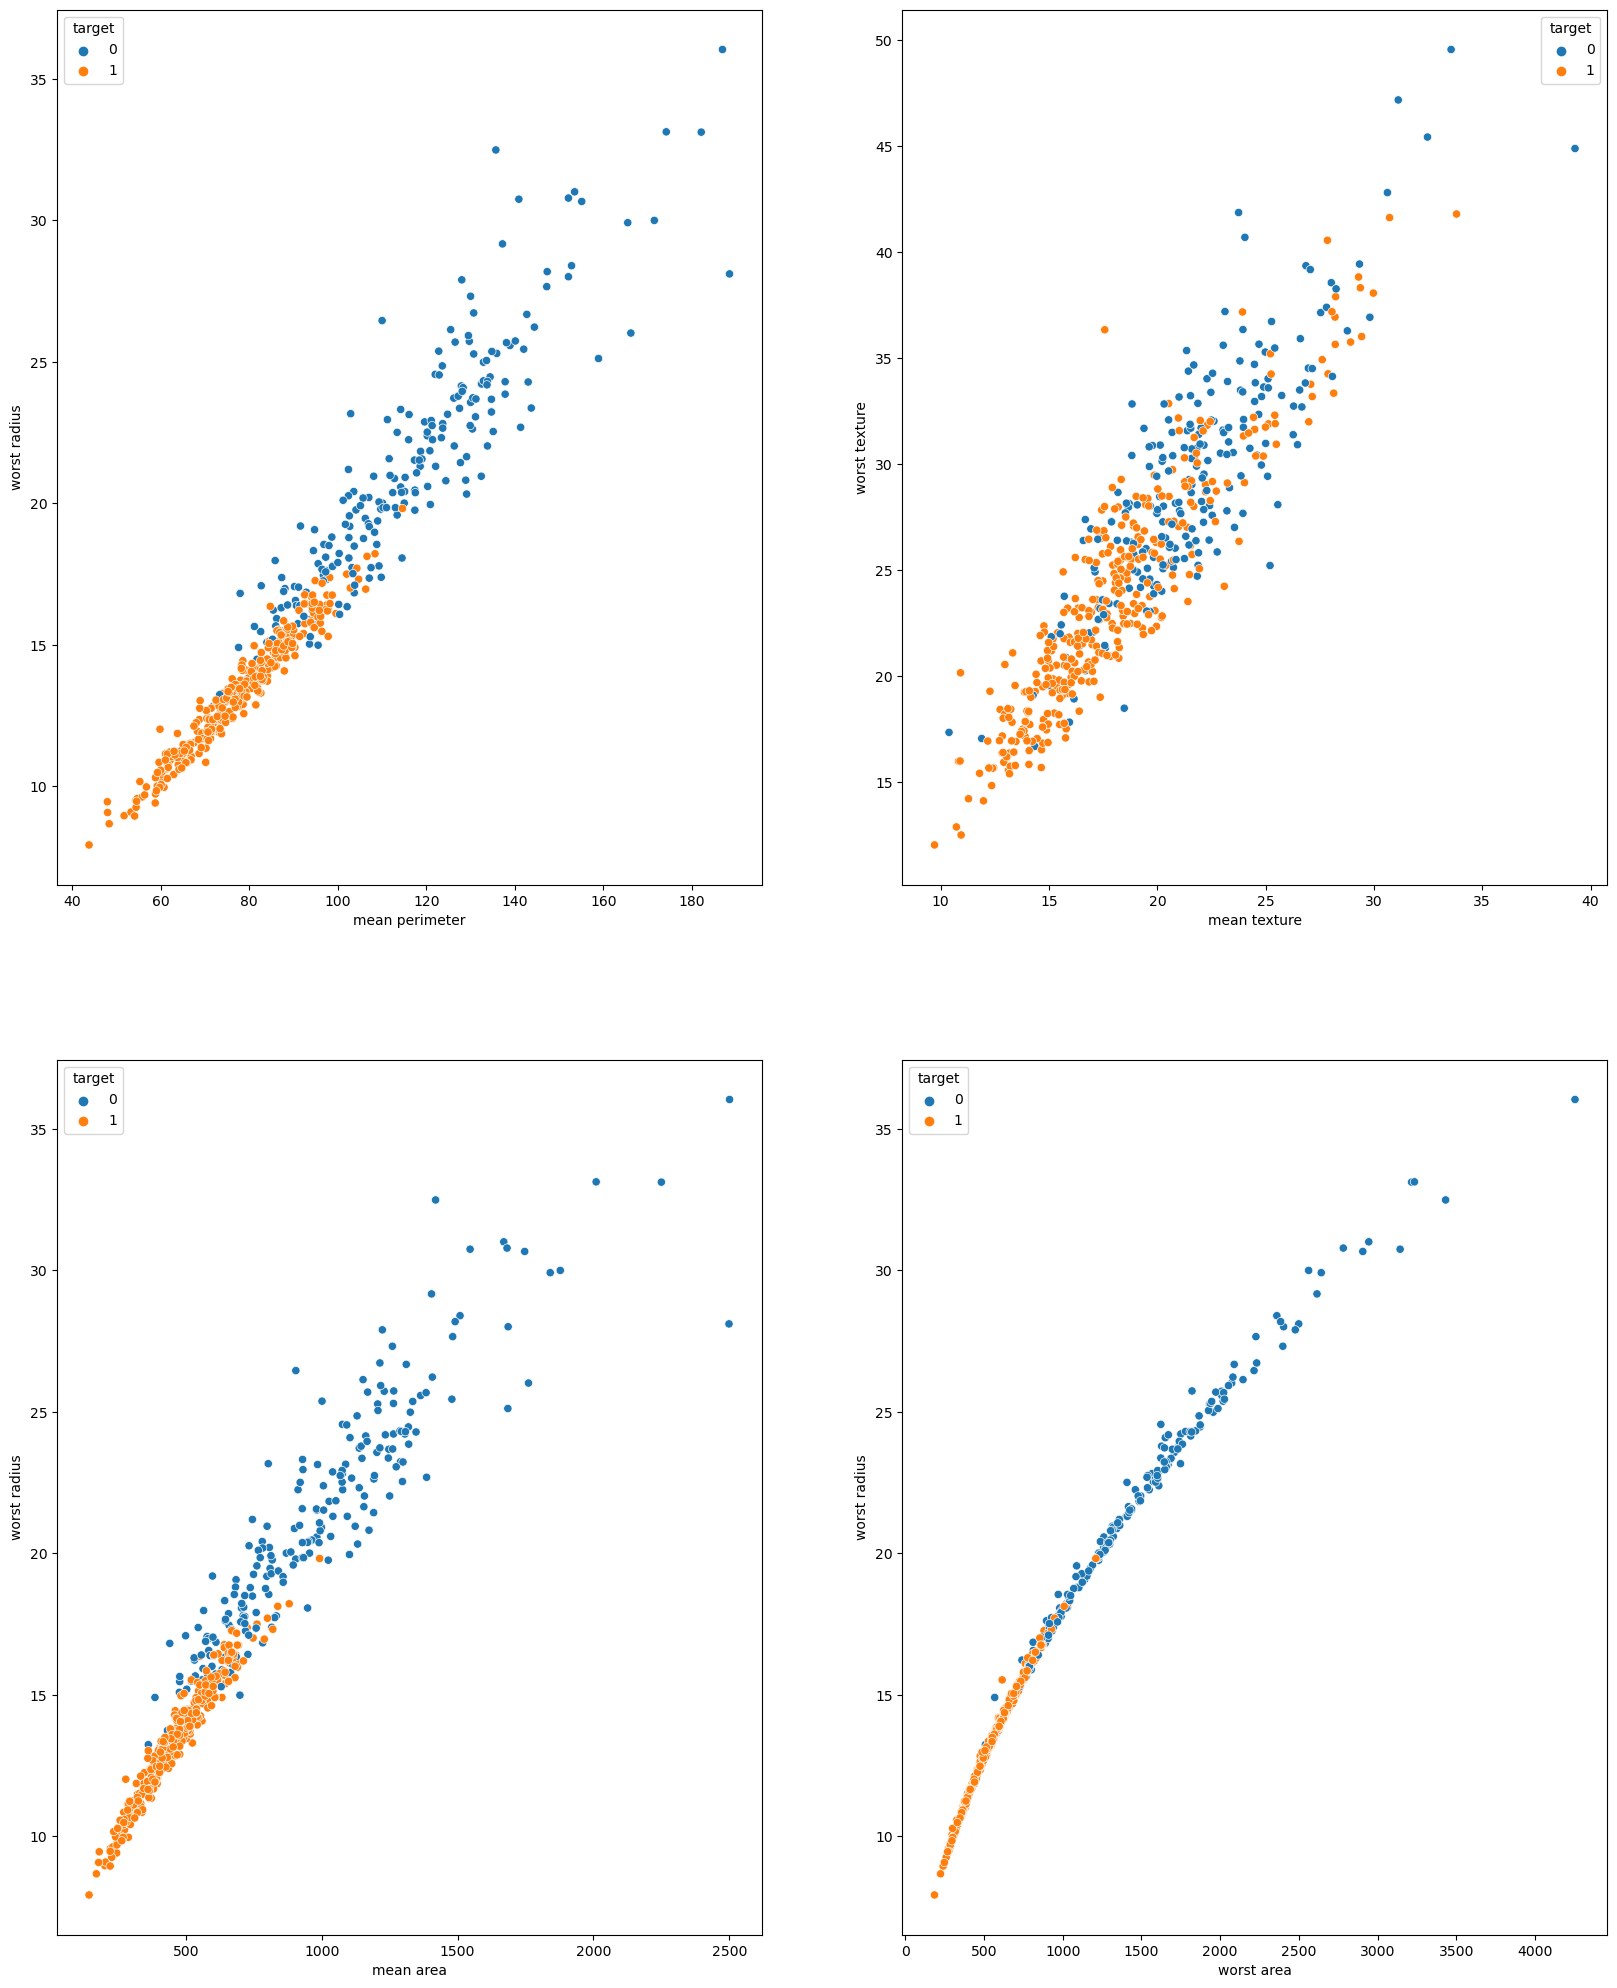

In [30]:
#postive correlation

fig, ax = plt.subplots(2, 2, figsize=(20, 25))
sns.scatterplot(x='mean perimeter', y='worst radius', data=df, hue='target', ax=ax[0, 0])
sns.scatterplot(x='mean area', y='worst radius', data=df, hue='target', ax=ax[1, 0])
sns.scatterplot(x='mean texture', y='worst texture', data=df, hue='target', ax=ax[0, 1])
sns.scatterplot(x='worst area', y='worst radius', data=df, hue='target', ax=ax[1, 1])
plt.show()


### 2.Negative Correlation

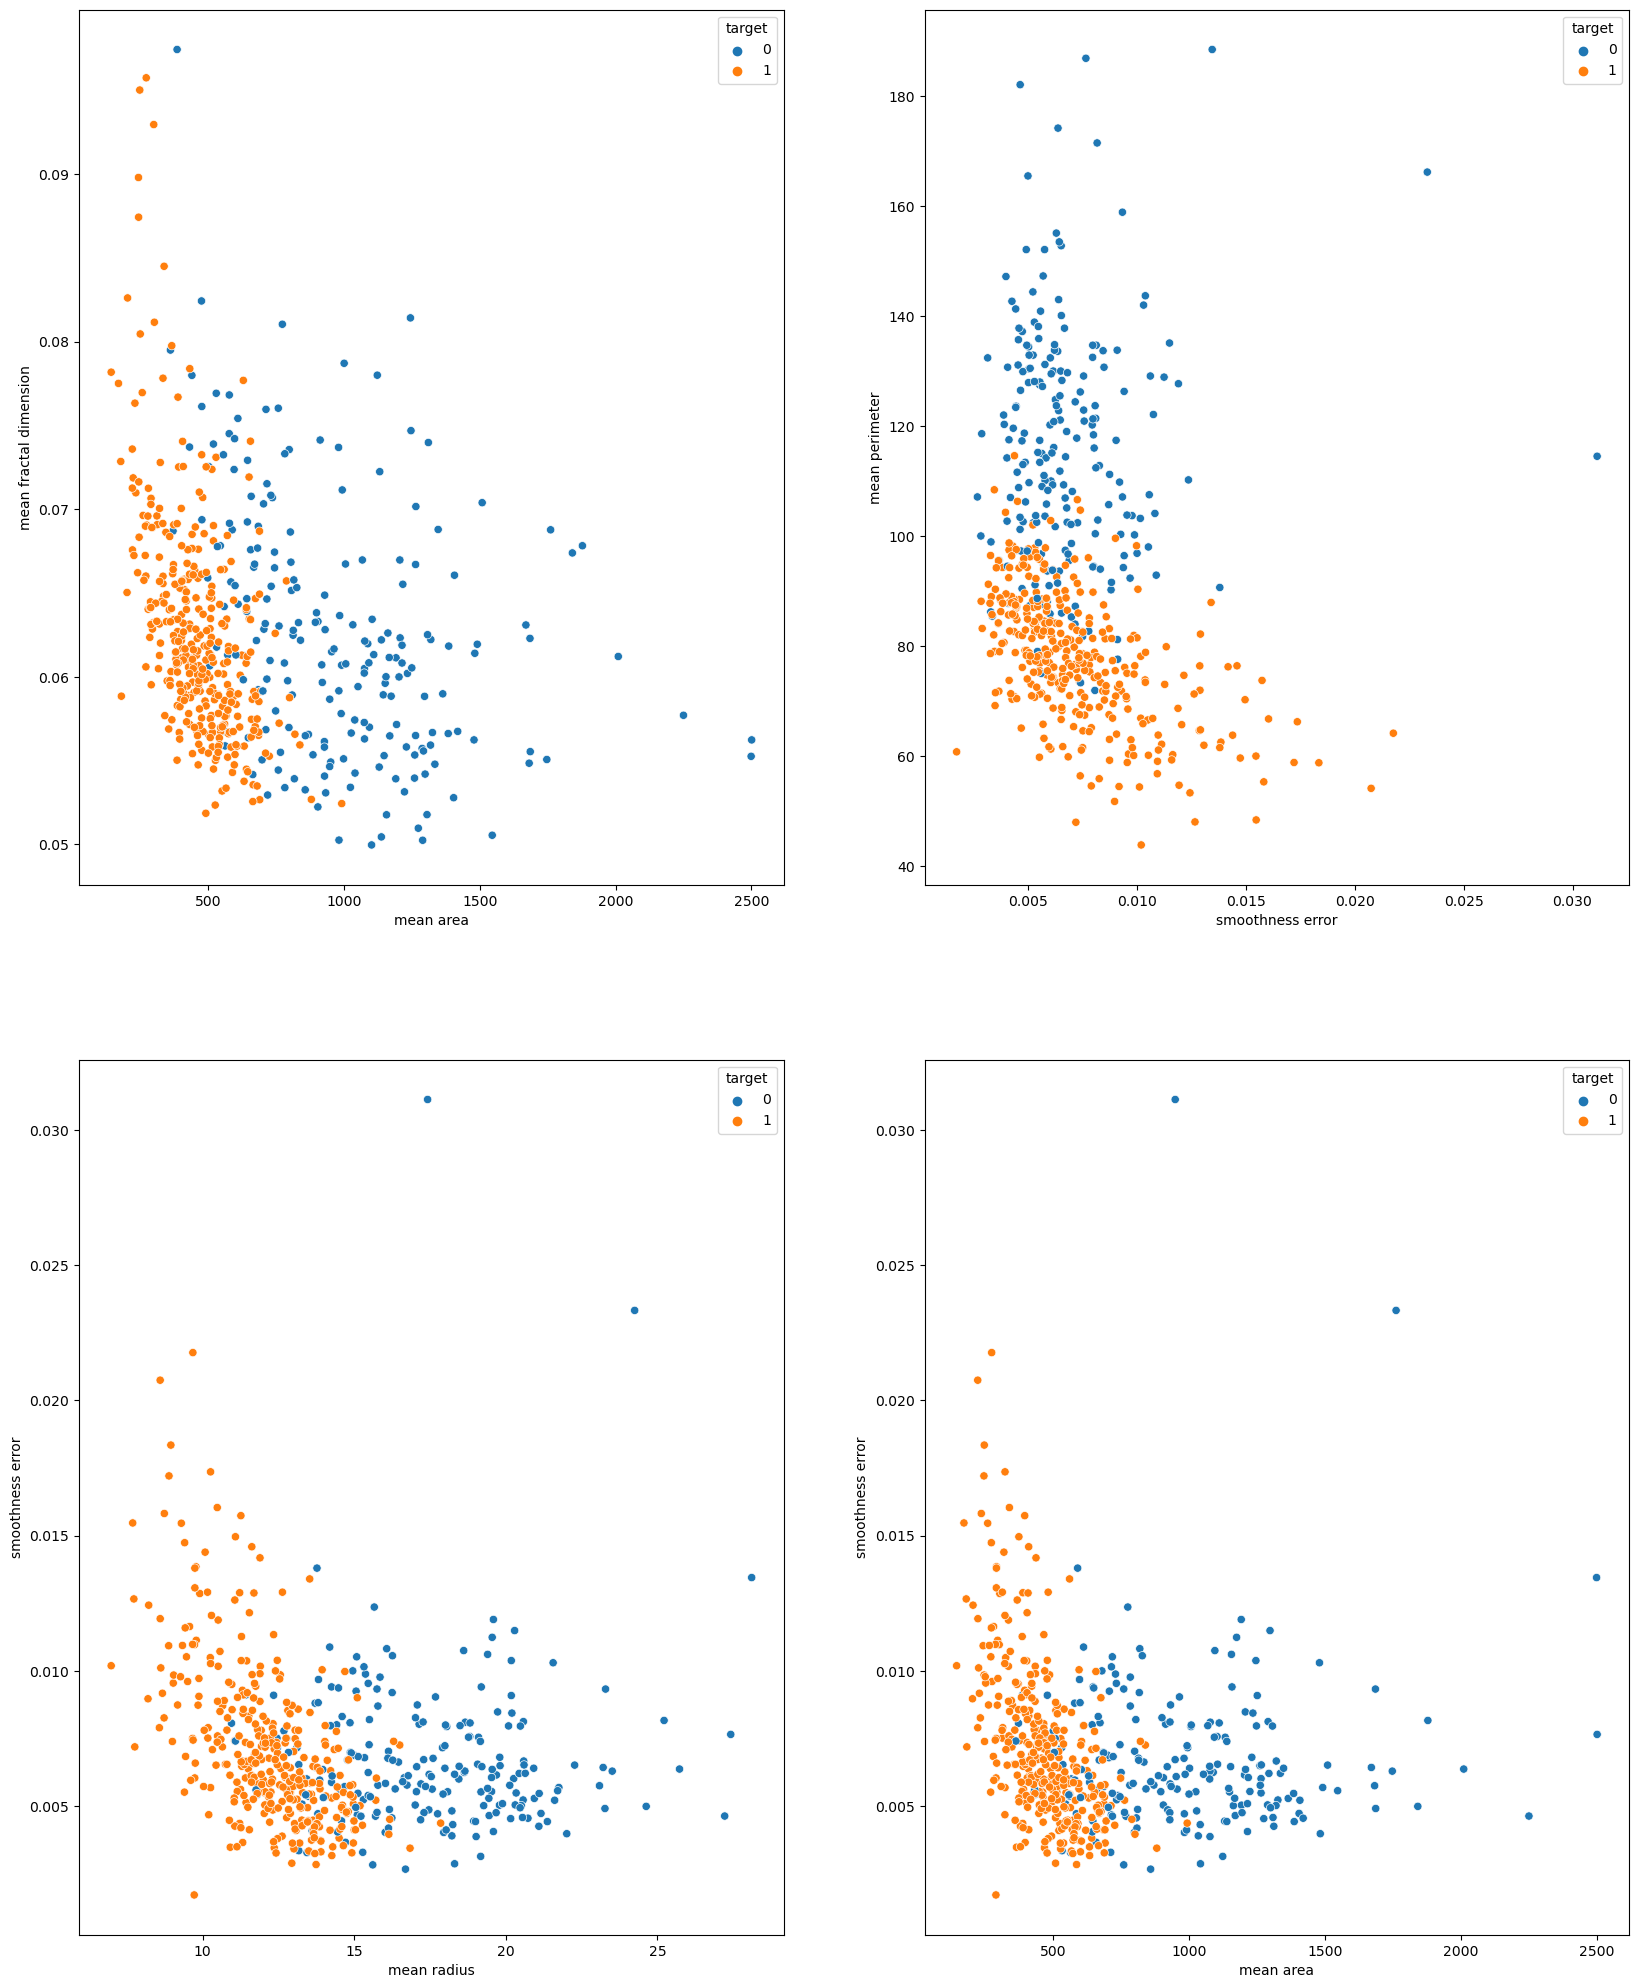

In [31]:
#Negative correlation

fig, ax = plt.subplots(2, 2, figsize=(20, 25))
sns.scatterplot(x='mean area', y='mean fractal dimension', data=df, hue='target', ax=ax[0, 0])
sns.scatterplot(x='mean radius', y='smoothness error', data=df, hue='target', ax=ax[1, 0])
sns.scatterplot(x='smoothness error', y='mean perimeter', data=df, hue='target', ax=ax[0, 1])
sns.scatterplot(x='mean area', y='smoothness error', data=df, hue='target', ax=ax[1, 1])
plt.show()


In [32]:
fig = px.scatter(df, x='worst texture', y='worst symmetry', color='target', size_max=60)
fig.show()

# Data Preprocessing

In [33]:
#making copy of dataframe for preprocessing
data = df.copy()

### Handaling null values

In [34]:
#checking for null values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Handling duplicated observations

In [35]:
#checking for duplicated observations
data.duplicated().sum()

0

### Dealing Multicollinearity

In [36]:
#removig columns with multicollinearity
data = data.drop(correlatd_col, axis=1)
data.shape

(569, 14)

### Independent and dependent features

In [37]:
x = data.drop("target",axis = 1) #independent features
y = data["target"] #dependent features

### Splitting dataset into test and train set

In [38]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
print('Shape of Train set: ', X_train.shape)
print('Shape of Test set: ', X_test.shape)

Shape of Train set:  (455, 13)
Shape of Test set:  (114, 13)


In [40]:
X_train.head()

mean radius  mean texture  mean smoothness  mean compactness  \
68         9.029         17.33          0.10660           0.14130   
181       21.090         26.57          0.11410           0.28320   
63         9.173         13.86          0.07721           0.08751   
248       10.650         25.22          0.09657           0.07234   
60        10.170         14.88          0.11340           0.08061   

     mean symmetry  mean fractal dimension  radius error  texture error  \
68          0.2111                 0.08046        0.3274         1.1940   
181         0.2395                 0.07398        0.6298         0.7629   
63          0.2341                 0.06963        0.4098         2.2650   
248         0.1897                 0.06329        0.2497         1.4930   
60          0.2743                 0.06960        0.5158         1.4410   

     smoothness error  compactness error  concave points error  \
68           0.009549            0.08606              0.033220   
181          0.004253            0.04759              0.015670   
63           0.008738            0.03938              0.015600   
248          0.007189            0.01035              0.006245   
60           0.007514            0.01099              0.008193   

     symmetry error  worst symmetry  
68          0.04197          0.4228  
181         0.01798          0.4098  
63          0.04192          0.3282  
248         0.02158          0.3409  
60          0.04183          0.3557

### Feature scaling

In [41]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [42]:
X_train

array([[-1.44075296, -0.43531947,  0.78057331, ...,  3.39198733,
         2.62116574,  2.09724217],
       [ 1.97409619,  1.73302577,  1.319843  , ...,  0.60059598,
        -0.31771686,  1.89116053],
       [-1.39998202, -1.24962228, -1.33264483, ...,  0.58946222,
         2.61504052,  0.59760192],
       ...,
       [ 0.04880192, -0.55500086, -2.26162674, ..., -1.31790901,
        -0.63867862, -0.70863864],
       [-0.03896885,  0.10207345,  0.73743174, ..., -0.37010838,
        -1.02211765,  0.43432185],
       [-0.54860557,  0.31327591, -1.12268916, ..., -0.81068696,
        -0.74770761, -0.3345212 ]])

# Building Machine Learning Models

## 1. Logistic regression

### Model training

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logReg = LogisticRegression(random_state=5)

In [45]:
#training the model with train set
logReg.fit(X_train, y_train)

LogisticRegression(random_state=5)

### Model evaluation

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#prediction for test data
y_pred = logReg.predict(X_test)

#evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [47]:
#storing evaluation metrics to a dataframe

results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.95614   0.958333  0.971831  0.965035

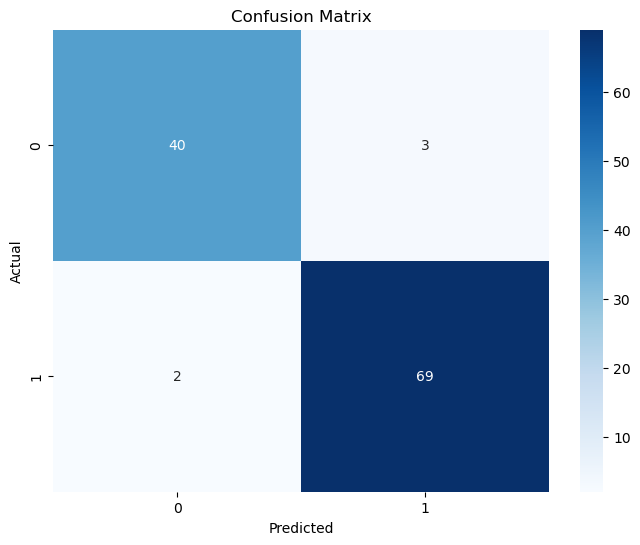

In [48]:
from sklearn.metrics import confusion_matrix

#printing confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### cross validation

In [60]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=10)


In [61]:
print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 95.59 %
Standard Deviation is 3.15 %


# 2. Random Forest Classifier

### Model Training

In [62]:
#instantiating the model
from sklearn.ensemble import RandomForestClassifier

ranForest = RandomForestClassifier(random_state=5)

#training the model
ranForest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [63]:
#model prediction with test data
y_pred = ranForest.predict(X_test)

### Model Evaluation

In [64]:
#evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [66]:

#storing evaluation metrics to a dataframe
rf_results = pd.DataFrame([['Random Forest Classifier', acc, pre, rec, f1]],
 columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(rf_results, ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.938596   0.957143  0.943662  0.950355
1  Random Forest Classifier  0.929825   0.943662  0.943662  0.943662

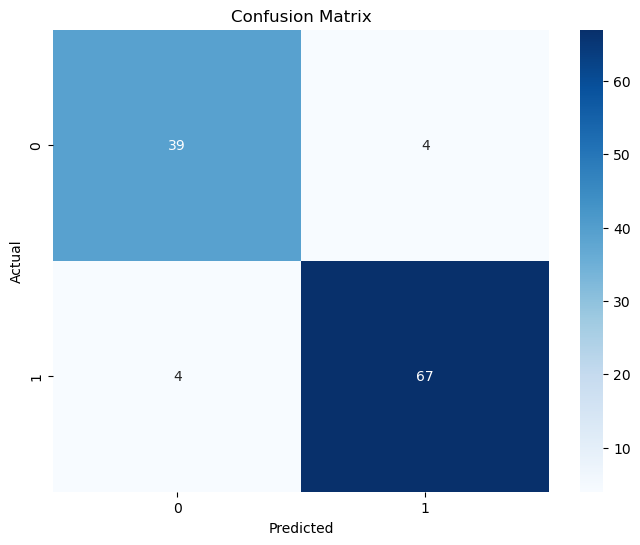

In [67]:
#printing confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### cross validation

In [68]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=ranForest, X=X_train, y=y_train, cv=10)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))


Accuracy is 94.71 %
Standard Deviation is 3.17 %


## Hyperparameter Tuning

In [71]:
#specifying differnet hyperparameters for random search cross validation
from sklearn.model_selection import RandomizedSearchCV

params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.1, 0.25, 0.5, 0.75],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
                                                               
random_search = RandomizedSearchCV(estimator=logReg, param_distributions=params, cv= 10)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
                   param_distributions={'C': [0.1, 0.25, 0.5, 0.75],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [72]:
#finding the best estimator
random_search.best_estimator_

LogisticRegression(C=0.5, random_state=5, solver='sag')

In [73]:
#finding best score
random_search.best_score_

0.9580676328502415

In [74]:
#finding best params
random_search.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.5}

# Final Model

In [77]:
#training the model with best hyperparameters
classifier = LogisticRegression(solver='sag', penalty='l2', C=0.5)
classifier.fit(X_train, y_train)


LogisticRegression(C=0.5, solver='sag')

In [78]:
#making predictions with test data
y_pred = classifier.predict(X_test)

## Model evaluation

In [79]:
#calculating evaluation metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#storing evaluation metrics to a dataframe

lg_results = pd.DataFrame([['Tuned Logistic Regression', acc, pre, rec, f1]],
 columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(lg_results, ignore_index=True)
results


Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.938596   0.957143  0.943662  0.950355
1   Random Forest Classifier  0.929825   0.943662  0.943662  0.943662
2  Tuned Logistic Regression  0.956140   0.958333  0.971831  0.965035

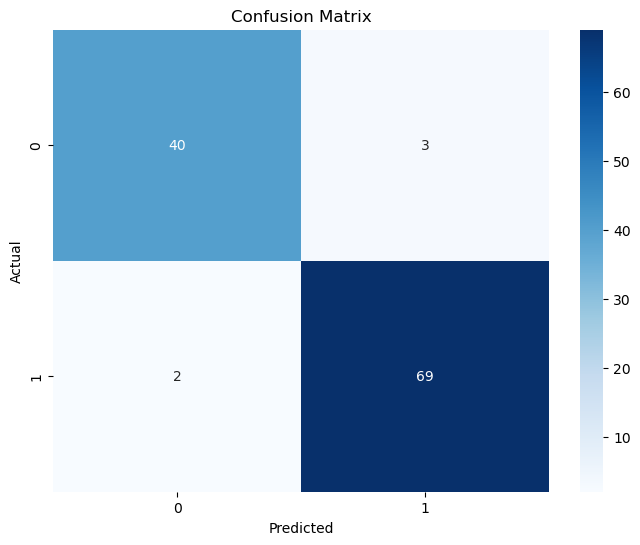

In [80]:
#printing confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()